In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re
import scipy as sci
import time

In [2]:
# global vars
samp_rt = 5120 #sampling rate Hz
time_import = 3000 # time to analyse seconds
data_import = samp_rt * time_import # lines of data to import

In [3]:
def list_o_list(big_list, lil_size):
    l_o_l = []
    for i in range(0, len(big_list), lil_size):
        lil = big_list[i : min(i + lil_size, len(big_list))]
        l_o_l.append(lil)
    return(l_o_l)

In [4]:
def freq_analysis(sample , ttime, responsefrq =1, sampfrq = 5120):
#     mmtic = time.perf_counter()
    frqs = ""
    amps = []
    samp_int = 1/sampfrq
    ft = np.fft.fft(sample)/len(sample)
#     mmhic = time.perf_counter()
    ft = ft[range(int(len(sample)/2))]
    tpCount = len(sample)
    values = np.arange(int(tpCount/2))
    timePeriod = tpCount/sampfrq
    frequencies = values/timePeriod
    ft = abs(ft)
#     mmcup = time.perf_counter()
    #print(len(ft))
    #print(len(frequencies))
    feq = pd.DataFrame(data = {"freq":frequencies})
#     l1 = time.perf_counter()
    feq["amp"] = ft
#     l2 = time.perf_counter()
    frqs = np.arange(0, 1 + int(feq.freq.max()), responsefrq)
#     l3 = time.perf_counter()
    #print(len(frqs))
#     mmbless = time.perf_counter()
    wow = feq.amp.rolling(10).mean()
    yep = np.arange(responsefrq - 1, len(wow) + responsefrq  -1, responsefrq)
    amps = wow[yep]
#     l4 = time.perf_counter()
#     mmtoc = time.perf_counter()
#     print("init:", mmhic-mmtic)
#     print("fft:", mmcup - mmhic, "total:", mmcup - mmtic)
#     print("df1:", mmbless - mmcup, "total:", mmbless - mmtic)
#     print("done:", mmtoc - mmbless, "total:", mmtoc - mmtic)
#     print("l1, l2, l3, l4:", l1-mmcup, l2-mmcup, l3-mmcup, l4-mmcup)
#     print("for:", l4 - l3)
    return(frqs, amps)

In [5]:
test_list  = list(range(1,33,4))
test_chop = 9
print(list_o_list(test_list, test_chop))


[[1, 5, 9, 13, 17, 21, 25, 29]]


In [6]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '01-08-19-V118',
 '03-05-19-V118',
 '03-26-19-V118',
 '08-14-18-V118',
 'data_prep.ipynb',
 'data_prep_development.ipynb',
 'EDA.ipynb',
 'EDA2.ipynb',
 'eda2_b.ipynb',
 'GPS Files',
 'July 6, 2020 Vehicle 118 Expo Line Test Train Data.xlsx',
 'Skytrain Linear Asset Database - Consolidated.xlsx',
 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx',
 'Switch Maint Works to date - April 2019.xlsx',
 'Test Train Sample Noise Data',
 'Test Train Sample Noise Data.zip']

In [7]:
home = os.getcwd()


In [8]:

os.chdir("08-14-18-V118")
os.getcwd()

'C:\\Users\\work_cbdvl\\Documents\\GitHub\\sturm\\08-14-18-V118'

In [9]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [10]:
print(files)

['.hubstorinfo', '08-14-18-V118_ch1.csv', '08-14-18-V118_ch2.csv', 'ft_first_3000.csv']


In [11]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"], nrows = data_import)
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"], nrows = data_import)
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")

In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15360000 entries, 0 to 15359999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 468.8 MB


In [13]:
acc_a = list(raw.acceleration_a)
acc_b = list(raw.acceleration_b)

In [14]:
l1 = list_o_list(acc_a, 5120)


In [15]:
l2 = list_o_list(acc_b, 5120)

In [16]:
len(l1[0])

5120

In [17]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
    

time diff: 7.519889499999977


In [27]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 10, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc-mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

time diff: 7.190048700000034


In [28]:
len(ft_l1)

3000

In [29]:
len(ft_l1[0])

256

In [30]:
len(frq_l1)

256

In [31]:
type(ft_l1)


list

In [32]:
type(ft_l1[0])

pandas.core.series.Series

In [34]:
dic_ = {}
for c,v in enumerate(frq_l1):
#     print(c , v)
    value = []
    for i in ft_l1:
#         print(i)
        value.append(i.iloc[c])
    key = str(v) + "_a"
    dic_[key] = value
        
    
    
    

In [35]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(i.iloc[c])
    key =  str(v) + "_b"
    dic_[key] = value

In [36]:
dic_.keys()

dict_keys(['0_a', '10_a', '20_a', '30_a', '40_a', '50_a', '60_a', '70_a', '80_a', '90_a', '100_a', '110_a', '120_a', '130_a', '140_a', '150_a', '160_a', '170_a', '180_a', '190_a', '200_a', '210_a', '220_a', '230_a', '240_a', '250_a', '260_a', '270_a', '280_a', '290_a', '300_a', '310_a', '320_a', '330_a', '340_a', '350_a', '360_a', '370_a', '380_a', '390_a', '400_a', '410_a', '420_a', '430_a', '440_a', '450_a', '460_a', '470_a', '480_a', '490_a', '500_a', '510_a', '520_a', '530_a', '540_a', '550_a', '560_a', '570_a', '580_a', '590_a', '600_a', '610_a', '620_a', '630_a', '640_a', '650_a', '660_a', '670_a', '680_a', '690_a', '700_a', '710_a', '720_a', '730_a', '740_a', '750_a', '760_a', '770_a', '780_a', '790_a', '800_a', '810_a', '820_a', '830_a', '840_a', '850_a', '860_a', '870_a', '880_a', '890_a', '900_a', '910_a', '920_a', '930_a', '940_a', '950_a', '960_a', '970_a', '980_a', '990_a', '1000_a', '1010_a', '1020_a', '1030_a', '1040_a', '1050_a', '1060_a', '1070_a', '1080_a', '1090_a', 

In [37]:
df = pd.DataFrame(data = dic_)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Columns: 512 entries, 0_a to 2550_b
dtypes: float64(512)
memory usage: 11.7 MB


In [39]:
df.describe()

,0_a,10_a,20_a,30_a,40_a,50_a,60_a,70_a,80_a,90_a,...,2460_b,2470_b,2480_b,2490_b,2500_b,2510_b,2520_b,2530_b,2540_b,2550_b
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,0.010199,0.004577,0.007899,0.009146,0.010439,0.008746,0.010328,0.011205,0.010931,0.008534,...,0.002639,0.002620,0.002711,0.002738,0.002649,0.002868,0.002847,0.002526,0.002478,0.002432
std,0.017958,0.004757,0.008208,0.010071,0.012105,0.009777,0.011111,0.015724,0.015432,0.012300,...,0.002940,0.003035,0.003161,0.003244,0.002898,0.003353,0.003523,0.002790,0.002734,0.002799
min,0.000708,0.000469,0.000419,0.000505,0.000420,0.000395,0.000555,0.000262,0.000139,0.000186,...,0.000072,0.000116,0.000082,0.000082,0.000088,0.000103,0.000099,0.000080,0.000082,0.000047
25%,0.002385,0.001399,0.001553,0.001558,0.001591,0.001505,0.004286,0.001180,0.000889,0.000837,...,0.000540,0.000463,0.000475,0.000443,0.000478,0.000733,0.000705,0.000524,0.000549,0.000491
50%,0.003362,0.003216,0.005669,0.006285,0.007233,0.005940,0.006212,0.005680,0.005850,0.004720,...,0.001807,0.001793,0.001780,0.001819,0.001793,0.001838,0.001783,0.001691,0.001675,0.001693
75%,0.006740,0.005870,0.011421,0.012362,0.013786,0.011685,0.012353,0.013855,0.013888,0.010956,...,0.003588,0.003614,0.003803,0.003870,0.003859,0.003805,0.003757,0.003521,0.003391,0.003289
max,0.247093,0.053908,0.089252,0.099943,0.121408,0.086571,0.136009,0.149118,0.159840,0.181195,...,0.031867,0.032938,0.038900,0.032661,0.026856,0.046754,0.067473,0.030790,0.030223,0.031847


In [40]:
name = "ft_first_" + str(time_import) + ".csv"
df.to_csv(name)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df)
print(pca.explained_variance_)


[0.22727068 0.03550042]


In [42]:
p_scores = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df)
    p_scores.append(sum(pca_n.explained_variance_))

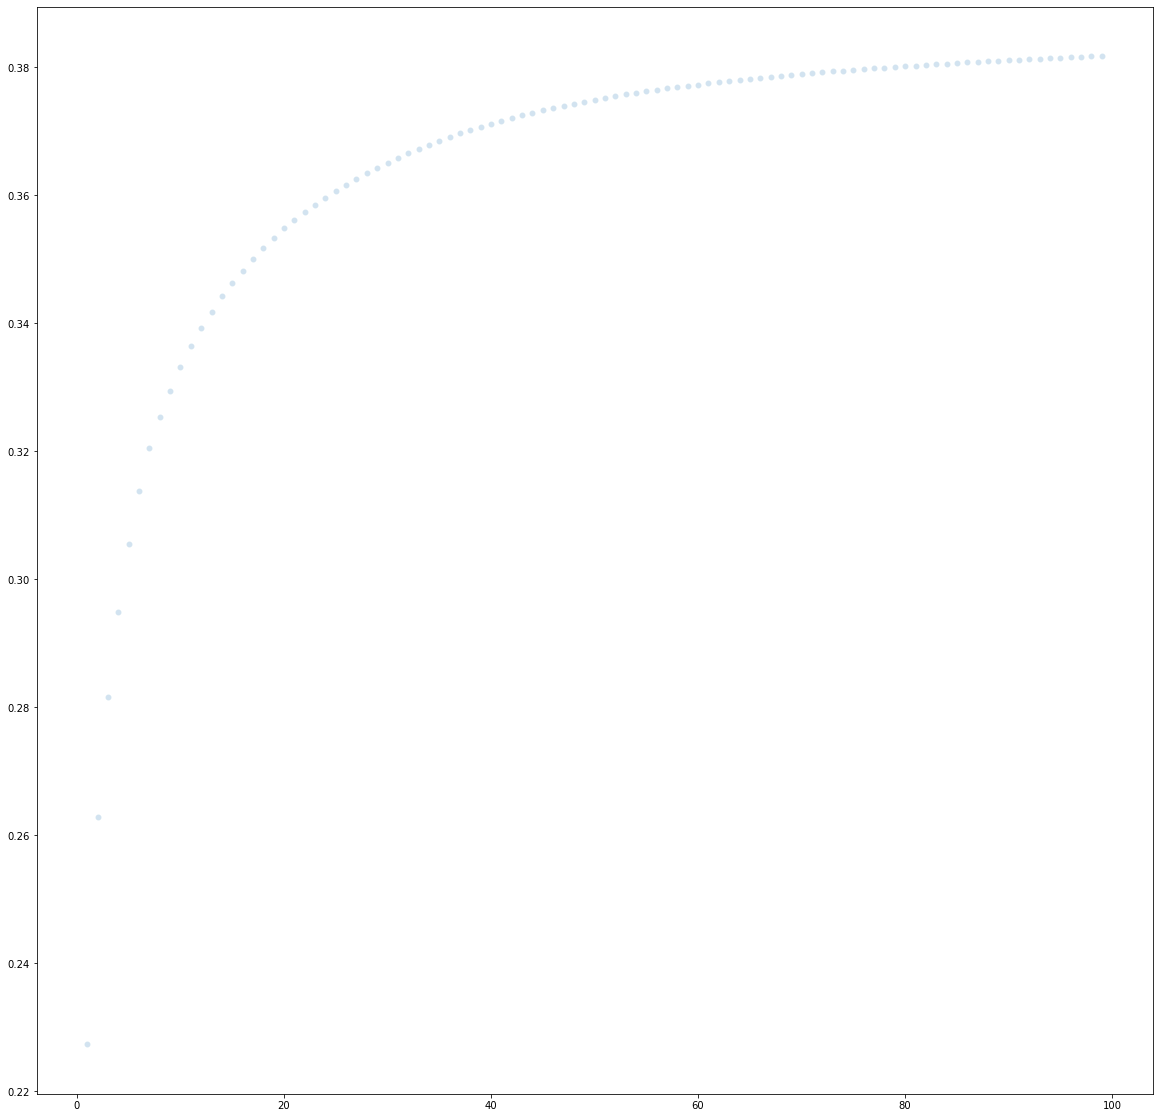

In [43]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores, alpha=0.2)
plt.show()

In [44]:
tic_a = time.perf_counter()
ft_l1 = []
frq_l1 = []
for i in l1:
    frq_l1, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l1.append(amp)
toc_a = time.perf_counter()
print("time diff:", toc_a - tic_a)
   

time diff: 6.504019299999982


In [45]:
tic_b = time.perf_counter()
ft_l2 = []
frq_l2 = []
count = 0
for i in l2:
#     mtic = time.perf_counter()
    frq_l2, amp = freq_analysis(i, 1, 1, samp_rt)
    ft_l2.append(amp)
#     mtoc = time.perf_counter()
#     print(count, mtoc- mtic)
    count += 1
toc_b = time.perf_counter()
print("time diff:", toc_b - tic_b)

0 0.006817099999807397
1 0.003337699999974575
2 0.003000900000188267
3 0.0026112999998986197
4 0.0022606999998515676
5 0.0039712000000236
6 0.0034146999998938554
7 0.003065300000116622
8 0.0024000999999316264
9 0.002374799999870447
10 0.0025745000000370055
11 0.003367000000025655
12 0.0024627999998756422
13 0.0025740000000951113
14 0.002185600000075283
15 0.0021477000000231783
16 0.0025190999999722408
17 0.002470900000162146
18 0.0023991999998997926
19 0.002312100000153805
20 0.0022449000000506203
21 0.002102800000102434
22 0.0026686000001063803
23 0.0028673999997863575
24 0.0028168000001187465
25 0.0022500999998555926
26 0.0022157000000788685
27 0.0022668999999950756
28 0.0021868999999696825
29 0.0023719999999229913
30 0.0024685999999292108
31 0.002204699999992954
32 0.0022784000000228843
33 0.0025146000000404456
34 0.002127499999915017
35 0.0023294000000078086
36 0.0022165999998833286
37 0.0021851999999853433
38 0.0023743000001559267
39 0.0022849999998015846
40 0.0029984000000240485


In [51]:
dic_1 = {}
for c,v in enumerate(frq_l1):
    value = []
    for i in ft_l1:
        value.append(i.iloc[c])
    key = str(v) + "_a"
    dic_1[key] = value
        
    
    
    

In [52]:
for c,v in enumerate(frq_l2):
    value = []
    for i in ft_l1:
        value.append(i[c])
    key =  str(v) + "_b"
    dic_1[key] = value

In [53]:
df_1 = pd.DataFrame(data = dic_1)
df_1.head()

,0_a,1_a,2_a,3_a,4_a,5_a,6_a,7_a,8_a,9_a,...,2550_b,2551_b,2552_b,2553_b,2554_b,2555_b,2556_b,2557_b,2558_b,2559_b
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002120,...,0.000623,0.000610,0.000610,0.000626,0.000603,0.000505,0.000611,0.000620,0.000665,0.000644
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002151,...,0.000592,0.000634,0.000634,0.000563,0.000658,0.000611,0.000536,0.000529,0.000558,0.000557
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001390,...,0.000503,0.000500,0.000576,0.000615,0.000722,0.000662,0.000707,0.000703,0.000672,0.000629
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001914,...,0.000543,0.000505,0.000463,0.000435,0.000470,0.000487,0.000500,0.000441,0.000470,0.000482
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001099,...,0.000603,0.000651,0.000622,0.000520,0.000452,0.000436,0.000404,0.000469,0.000440,0.000547


In [49]:
p_scores_1 = []
for i in np.arange(1,100):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

ValueError: at least one array or dtype is required

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,100), y=p_scores_1, alpha=0.2)
plt.show()

In [ ]:
p_scores_1 = []
for i in np.arange(1,1000):
    pca_n = PCA(n_components = i)
    pca_n.fit(df_1)
    p_scores.append(sum(pca_n.explained_variance_))

In [ ]:
plt.figure(figsize=(20,20))
sb.scatterplot(x=np.arange(1,1000), y=p_scores_1, alpha=0.2)
plt.show()